In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,1,'ERROR: 5.896904691880527')

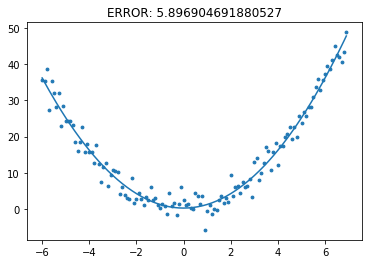

In [2]:
X_simple = np.arange(-6, 7, 0.1).reshape(-1, 1)
y_simple = [x**2 + np.random.normal(0,2.5) for x in X_simple]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
m = LinearRegression()
m.fit(X_simple**2, y_simple)
ypred = m.predict(X_simple**2)

plt.figure()
plt.scatter(X_simple, y_simple, s=8) #here I'm plotting the data
plt.plot(X_simple, ypred) #here I'm plotting the regression line 
error = mean_squared_error(y_simple, ypred)
plt.title(f'ERROR: {error}')

In [3]:
import pandas as pd
df = pd.read_csv('../bike-sharing-demand/train.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

Text(0.5,1,'SCORE: 0.44699454910542785')

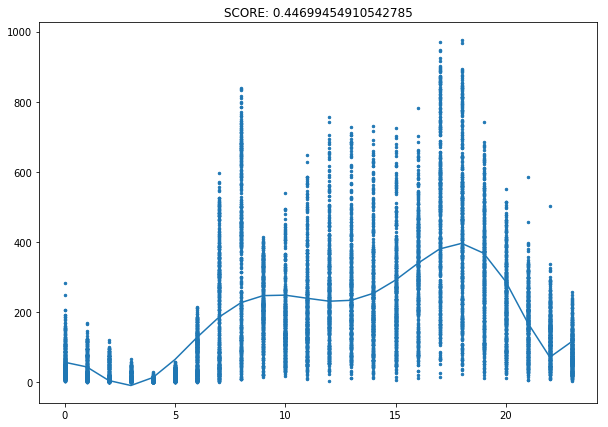

In [4]:
from sklearn.preprocessing import PolynomialFeatures

data = df.sort_values(by='hour')

poly = PolynomialFeatures(degree=7)
hour_poly = poly.fit_transform(data[['hour']])

m = LinearRegression()
m.fit(hour_poly, data['count'])

ypred = m.predict(hour_poly)

plt.figure(figsize=(10,7))
plt.scatter(data['hour'], data['count'], s=6)
plt.plot(data['hour'], ypred)
plt.title(f'SCORE: {m.score(hour_poly, data["count"])}')

In [5]:
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7']

In [6]:
m.coef_

array([ 0.00000000e+00,  2.97888668e+01, -6.41067839e+01,  2.43496071e+01,
       -3.60902830e+00,  2.56352952e-01, -8.73698142e-03,  1.14657948e-04])

Final prediction = 0*hour^0 + 29.7*hour^1 + (-6.41)*hour^2 + 24.3*hour^3 + ..... + 0.00014*hour^7

In [21]:
X = df.drop(['season', 'atemp', 'windspeed', 'casual', 'registered', 'count', 'datetime', 'holiday'], axis=1)

In [22]:
y = df['count']

In [23]:
from sklearn.metrics import mean_squared_log_error

m = LinearRegression()
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

print(X.columns)
print(poly.get_feature_names())
print(len(poly.get_feature_names()))

m.fit(X_poly, np.log(y))
ypred_log = m.predict(X_poly)

print(f'RMSLE SCORE: {np.sqrt(mean_squared_log_error(y, np.exp(ypred_log)))}')

Index(['workingday', 'weather', 'temp', 'humidity', 'month', 'year', 'day',
       'hour'],
      dtype='object')
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6', 'x0^2 x7', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x3^2', 'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x4^2', 'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x5^2', 'x0 x5 x6', 'x0 x5 x7', 'x0 x6^2', 'x0 x6 x7', 'x0 x7^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1^2 x6', 'x1^2 x7', 'x1 x2^2', 'x1 x2 x3', 'x1 x

---

## Regularization

Text(0.5,1,'DEGREE: 12, MSE: 0.53')

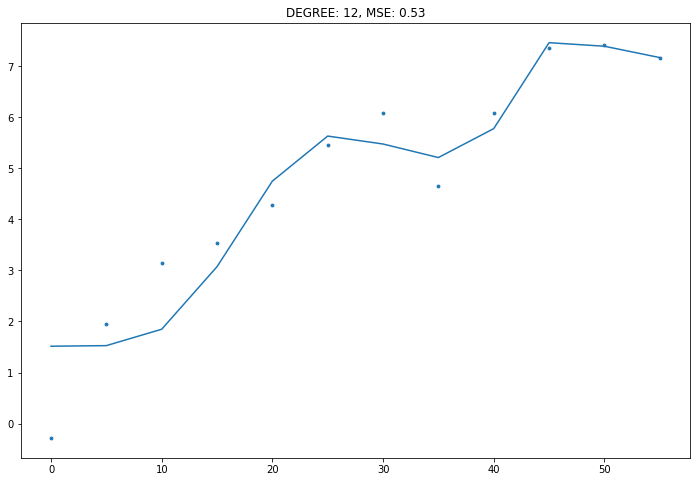

In [24]:
import math
X_simple = np.arange(0, 60, 5).reshape(-1,1)
y_simple = [math.sqrt(x) + np.random.normal(0, 0.6) for x in X_simple]

DEGREE = 12
poly = PolynomialFeatures(degree=DEGREE)
X_poly = poly.fit_transform(X_simple)


m = LinearRegression()
m.fit(X_poly, y_simple)
ypred = m.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X_simple, y_simple, s=8)
plt.plot(X_simple, ypred)
plt.title(f'DEGREE: {DEGREE}, MSE: {round(mean_squared_error(ypred, y_simple), 2)}')

Text(0.5,1,'DEGREE: 4, MSE: 0.51')

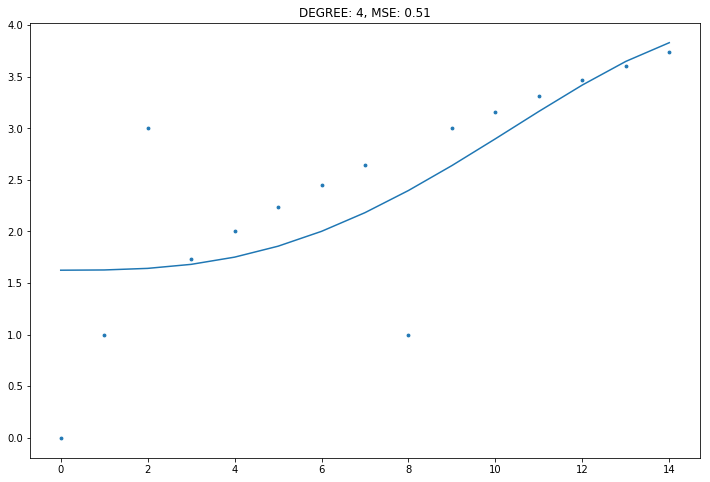

In [25]:
X_simple = np.arange(0, 15, 1).reshape(-1,1)
y_simple = [math.sqrt(x) for x in X_simple]

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


#CREATE SOME OUTLIERS 
y_simple[2] = 3
y_simple[8] = 1


DEGREE = 4
poly = PolynomialFeatures(degree=DEGREE) #increases complexity
X_poly = poly.fit_transform(X_simple)


# m = LinearRegression()
# m = Ridge(alpha=6.0) #decreases complexity
m = Lasso(alpha=6.0)

m.fit(X_poly, y_simple)
ypred = m.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X_simple, y_simple, s=8)
plt.plot(X_simple, ypred)
plt.title(f'DEGREE: {DEGREE}, MSE: {round(mean_squared_error(ypred, y_simple), 2)}')

In [26]:
m.coef_

array([ 0.        ,  0.        ,  0.        ,  0.00244978, -0.00011757])

---

### Good Use Case for Lasso

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# m = LinearRegression()
m = Lasso(alpha=1.0)
DEGREE = 6
poly = PolynomialFeatures(degree=DEGREE)
X_train_poly = poly.fit_transform(X_train)

m.fit(X_train_poly, np.log(y_train))
ypred_train_log = m.predict(X_train_poly)

#I now have to transform my X test data in the same way I transformed my X train data!

X_test_poly = poly.transform(X_test) ### DO NOT REFIT! JUST TRANSFORM!
ypred_test_log = m.predict(X_test_poly)

print(f'With DEGREE of {DEGREE}, I get {len(poly.get_feature_names())} features!')
print(f'After Lasso regularization, only {len(m.coef_[m.coef_ != 0.00])} remain!')
print()
print(f'I get a training RMSLE of ... {np.sqrt(mean_squared_log_error(y_train, np.exp(ypred_train_log)))}')
print(f'I get a testing RMSLE of ... {np.sqrt(mean_squared_log_error(y_test, np.exp(ypred_test_log)))}')
print()
print('Here are the coefficients (slopes and intercepts of all my features...)\n')
print(m.coef_)

/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


With DEGREE of 6, I get 3003 features!
After Lasso regularization, only 2424 remain!

I get a training RMSLE of ... 0.6728764544199528
I get a testing RMSLE of ... 0.7040104275430412

Here are the coefficients (slopes and intercepts of all my features...)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.35553457e-08
  7.41930446e-10 -1.47044808e-08]
